In [31]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random

In [23]:
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

In [24]:
x_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values

x_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

In [25]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])
model.summary()

C:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer= 'sgd', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 928us/step - accuracy: 0.9041 - loss: 0.3481 - val_accuracy: 0.9190 - val_loss: 0.2901
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 799us/step - accuracy: 0.9171 - loss: 0.2939 - val_accuracy: 0.9286 - val_loss: 0.2569
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - accuracy: 0.9273 - loss: 0.2584 - val_accuracy: 0.9346 - val_loss: 0.2343
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 814us/step - accuracy: 0.9342 - loss: 0.2332 - val_accuracy: 0.9389 - val_loss: 0.2158
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 819us/step - accuracy: 0.9383 - loss: 0.2157 - val_accuracy: 0.9429 - val_loss: 0.2009


In [39]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print("loss=%.3f" %test_loss)
print("accuracy=%.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.9332 - loss: 0.2342
loss=0.201
accuracy=0.943


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step
predicted value:  [1.6031913e-03 2.2375149e-05 1.7801906e-03 3.9590612e-01 1.9102254e-06
 5.7043356e-01 1.7359287e-07 1.5634073e-04 2.8024539e-02 2.0716386e-03]
5


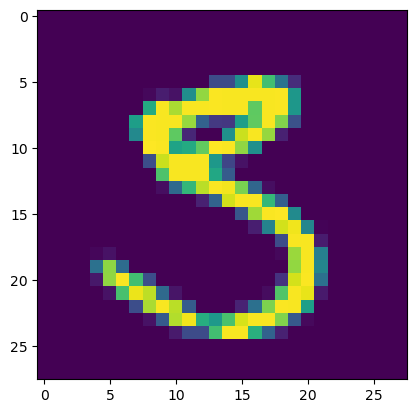

In [40]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show
predicted_value = model.predict(x_test)
plt.imshow(x_test[n])
plt.show
print('predicted value: ', predicted_value[n])
print(np.argmax(predicted_value[n], axis=0))

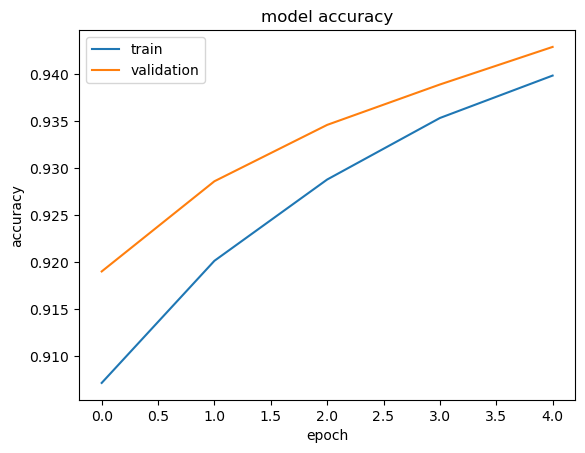

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'], loc='upper left')

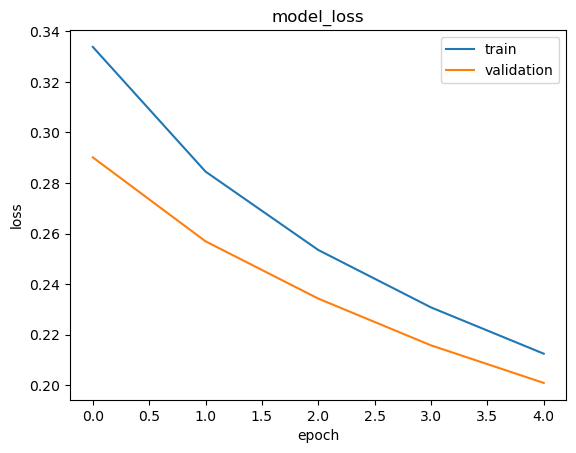

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc = 'upper right')